# INTRODUCTION:

As my Intro To Machine Learning Project, I want to choose tmdb-movies database for the analysis.
Here are the question that can be answered by looking into the data.
1. Profit of the movie varies from year by year.
2. Average runtimes of movies throughout the year.
3. In which month most of the movie releases.
4. Top 5 cheapest and most expensive profitable movies?
5. What are the factors affecting revenue and popularity of a film?


## DATA WRANGLING

In [31]:
# import all the useful libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [32]:
# load data to the Data Frame
movie_df = pd.read_csv('tmdb-movies.csv')
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [33]:
## know the shape of the data
movie_df.shape

(10866, 21)

In [50]:
# collums with null values
new_df.columns[new_df.isnull().any()].tolist()

['cast', 'director', 'genres', 'production_companies']

In [51]:
# Number of rows with null values
new_df.isnull().any(axis=1).sum()

1093

In [52]:
## number of duplicates
sum(new_df.duplicated())

1

## Data Cleaning

In [34]:
# Make new DataFrame with only required columns
req_col = ['id','popularity','budget','revenue','original_title','cast','director','runtime','genres','production_companies','vote_count','vote_average','release_date','release_year']
new_df = movie_df[req_col]
new_df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_date,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,6/9/15,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,5/13/15,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,3/18/15,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,12/15/15,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,4/1/15,2015


In [35]:
# Know the shape of the dataFrame
new_df.shape

(10866, 14)

In [36]:
# Know the data types of each columns
new_df.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
vote_count                int64
vote_average            float64
release_date             object
release_year              int64
dtype: object

## Exploration

### 1. Profit of the movie varies from year by year.

In [40]:
#add new columns having values of profit or loss

new_df.insert(3, 'profit_loss', new_df['revenue'] - new_df['budget'])

In [41]:
# Know how the data looks after adding
new_df.head()

,id,popularity,budget,profit_loss,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_date,release_year
0,135397,32.985763,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,6/9/15,2015
1,76341,28.419936,150000000,228436354,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,5/13/15,2015
2,262500,13.112507,110000000,185238201,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,3/18/15,2015
3,140607,11.173104,200000000,1868178225,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,12/15/15,2015
4,168259,9.335014,190000000,1316249360,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,4/1/15,2015


/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

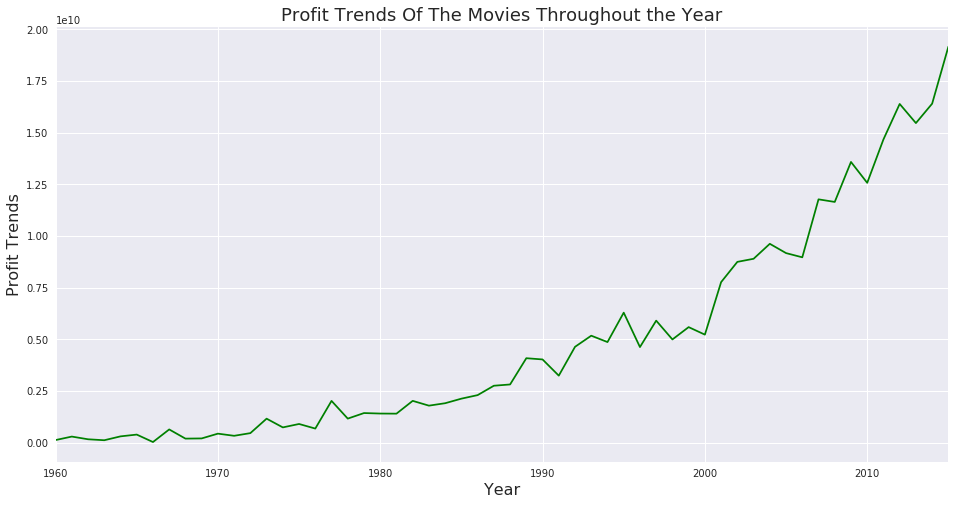

In [42]:
# Calulate and plot the variation of the year and profit over the years

new_df.groupby('release_year')['profit_loss'].sum().plot(kind = 'line', figsize = (16, 8), color = 'g')
plt.title('Profit Trends Of The Movies Throughout the Year', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Profit Trends', fontsize = 16);

### Average runtimes of movies throughout the year.

Text(0,0.5,'Runtime')

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

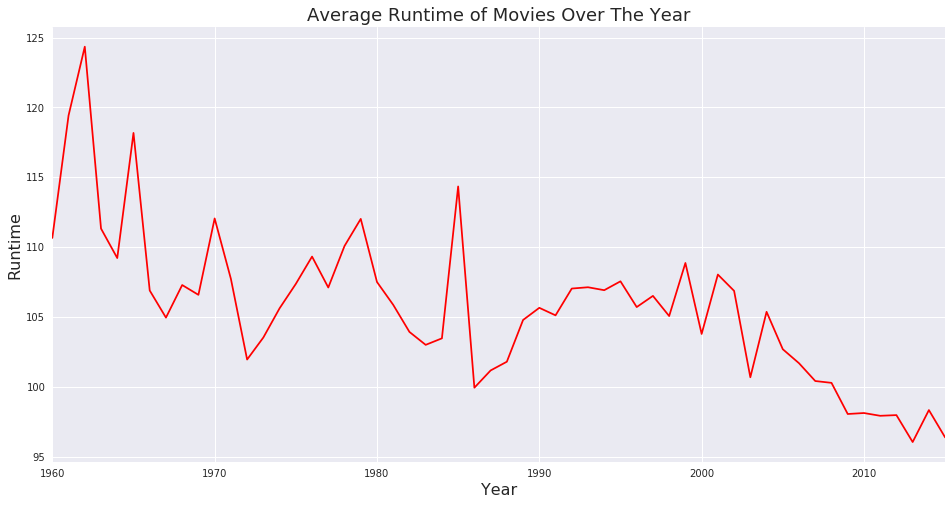

In [43]:
# Calculate and plot the average runtime of the movies over the year.

new_df.groupby('release_year')['runtime'].mean().plot(kind='line', figsize = (16, 8), color = 'r')
plt.title('Average Runtime of Movies Over The Year', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Runtime', fontsize = 16)

### In which month most of the movie releases.

In [44]:
# New Data frame which include only data having budget >0 and revenue > 0

new_df2=new_df[(new_df['budget']>0) & (new_df['revenue']>0)]
new_df2.shape


(3855, 15)

In [45]:
# Calculate which month has got most releases.

months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
new_df2['release_month']=pd.to_datetime(new_df2['release_date']).dt.month
noRelMnth= new_df2.release_month.value_counts().sort_index()
df4 = pd.DataFrame()
df4['Months']=months

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

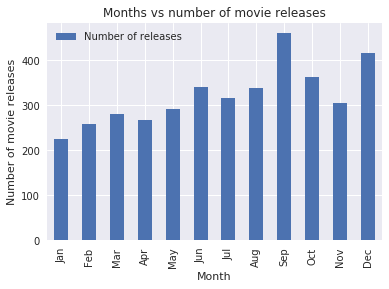

In [46]:
# Plot which month has got most releases.

df4['Number of releases'] = noRelMnth.get_values()
df4.plot(x='Months',y='Number of releases',kind='bar');
plt.title('Months vs number of movie releases');
plt.ylabel('Number of movie releases');
plt.xlabel('Month');

### Top 5 cheapest and most expensive profitable movies?

In [47]:
# Gatther only the required columns and calculate top 5 cheapest and expensive movies in ascending order

col = ['original_title', 'cast', 'director', 'budget', 'revenue', 'profit_loss']

new_df.query('profit_loss>50000000')[col].sort_values('budget', ascending = False).head(5)


,original_title,cast,director,budget,revenue,profit_loss
3375,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,380000000,1021683000,641683000
7387,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,300000000,961000000,661000000
14,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,280000000,1405035767,1125035767
6570,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,270000000,391081192,121081192
1929,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,Nathan Greno|Byron Howard,260000000,591794936,331794936


In [48]:
# Gatther only the required columns and calculate top 5 cheapest and expensive movies in ascending order

new_df.query('profit_loss>50000000')[col].sort_values('budget', ascending = True).head(5)

,original_title,cast,director,budget,revenue,profit_loss
10819,Hooper,Burt Reynolds|Robert Klein|Adam West|Jan-Micha...,Hal Needham,0,78000000,78000000
9545,Beaches,Bette Midler|Barbara Hershey|John Heard|Spaldi...,Garry Marshall,0,57041866,57041866
1409,The Pink Panther 2,Steve Martin|Jean Reno|Emily Mortimer|Andy Gar...,Harald Zwart,0,75871032,75871032
9467,Crocodile Dundee II,Paul Hogan|Linda Kozlowski|John Meillon|Ernie ...,John Cornell,0,239606210,239606210
9464,Scrooged,Bill Murray|Karen Allen|John Forsythe|Bobcat G...,Richard Donner,0,60328000,60328000


### What are the factors affecting revenue and popularity of a film?

In [49]:
# Use Corr function which corelate diffent columns and priovide the result accordingly
new_df.corr()

,id,popularity,budget,profit_loss,revenue,runtime,vote_count,vote_average,release_year
id,1.000000,-0.014350,-0.141351,-0.074960,-0.099227,-0.088360,-0.035551,-0.058363,0.511364
popularity,-0.014350,1.000000,0.545472,0.628991,0.663358,0.139033,0.800828,0.209511,0.089801
budget,-0.141351,0.545472,1.000000,0.570182,0.734901,0.191283,0.632702,0.081014,0.115931
profit_loss,-0.074960,0.628991,0.570182,1.000000,0.976160,0.136036,0.755905,0.183109,0.032002
revenue,-0.099227,0.663358,0.734901,0.976160,1.000000,0.162838,0.791175,0.172564,0.057048
runtime,-0.088360,0.139033,0.191283,0.136036,0.162838,1.000000,0.163278,0.156835,-0.117204
vote_count,-0.035551,0.800828,0.632702,0.755905,0.791175,0.163278,1.000000,0.253823,0.107948
vote_average,-0.058363,0.209511,0.081014,0.183109,0.172564,0.156835,0.253823,1.000000,-0.117632
release_year,0.511364,0.089801,0.115931,0.032002,0.057048,-0.117204,0.107948,-0.117632,1.000000


#### As we can see in the above table that their is strong corelation between popularity,vote count, budget and week corelation  with runtime in case of revenue

## Conclusion

After analysing such data, i came to know the steps involve in data analysis practicaly. The data had some null values and some duplicate values which i cleared in the data cleaning and wrangling phase. This is already cleaned data at some extends but we can't get such data in real life. We need to do more data cleaning and data wrangling. 